In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [ ]:
if sys.platform == 'darwin' :
    print(" Mac OS ")
else :
    print(' Windows ')

In [1]:
import pandas as pd

In [1]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

#plt.rcParams["font.family"] =  "Malgun Gothic"
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [2]:
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
import seaborn as sns

## 모듈 설치하기

###  주식정보 검색 모듈 설치
!pip install finacedatareader -U

### 버전 확인하기 

In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.2'

#  FinanceDataReader 사용자 안내서

> https://financedata.github.io/posts/finance-data-reader-users-guide.html

> https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide

# 1. 상장기업 정보 가져오기

In [5]:
df_krx = fdr.StockListing('KRX')

In [6]:
df_krx.head()

,Symbol,Name,Sector,Industry
0,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
1,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
2,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [7]:
df_krx.tail()

,Symbol,Name,Sector,Industry
2269,299480,지앤이헬스케어,기타 섬유제품 제조업,면생리대
2270,199800,툴젠,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,..."
2271,228180,티씨엠생명과학,자연과학 및 공학 연구개발업,체외진단서비스 개발 및 진단 용역
2272,217880,틸론,소프트웨어 개발 및 공급업,"Cloud Solution (D,A,E,Rstation)"
2273,202960,판도라티비,소프트웨어 개발 및 공급업,"판도라TV, KM 플레이어"


In [8]:
df_krx.shape

(2274, 4)

In [9]:
df_krx.values

array([['001250', 'GS글로벌', '상품 종합 도매업',
        '수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서비스/부동산 임대'],
       ['082740', 'HSD엔진', '일반 목적용 기계 제조업', '대형선박용엔진,내연발전엔진'],
       ['001390', 'KG케미칼', '기초 화학물질 제조업', '콘크리트혼화제, 비료, 친환경농자재, 수처리제'],
       ...,
       ['228180', '티씨엠생명과학', '자연과학 및 공학 연구개발업', '체외진단서비스 개발 및 진단 용역'],
       ['217880', '틸론', '소프트웨어 개발 및 공급업',
        'Cloud Solution (D,A,E,Rstation)'],
       ['202960', '판도라티비', '소프트웨어 개발 및 공급업', '판도라TV, KM 플레이어']],
      dtype=object)

In [10]:
df_krx.dtypes

Symbol      object
Name        object
Sector      object
Industry    object
dtype: object

In [11]:
df_krx.size

9096

# 2.  코스피 종목 가져오기

In [12]:
df_kospi = fdr.StockListing('KOSPI')

In [13]:
df_kospi.shape

(791, 4)

# 3.  코스닥 정보 가져오기

In [14]:
df_kosdaq = fdr.StockListing('KOSDAQ')

In [15]:
df_kosdaq.shape

(1332, 4)

# 4.  신라젠 정보 및 재무정보 가져오기 


    가격 데이터 - 국내주식
    단축 코드(6자리)를 사용.

    코스피 종목: 068270(셀트리온), 005380(현대차) 등
    코스닥 종목: 215600(신라젠), 151910(나노스) 등

In [16]:
item_name = "신라젠"

In [17]:
df_krx.query("Name=='{}'".format(item_name))[['Symbol','Name']]

,Symbol,Name
743,215600,신라젠


In [18]:
df_krx.query("Name=='{}'".format(item_name))['Symbol'].iloc[0]

'215600'

## 재무제표 정보 가져오기 

In [19]:
import fsdata

In [20]:
fs_data = fsdata.make_fsdata("A" + df_krx.query("Name=='{}'".format(item_name))['Symbol'].iloc[0])

In [21]:
fs_data

,2015/12,2016/12,2017/12,2018/12
IFRS(연결),,,,
매출액,18.0,53.0,69.0,77.0
영업이익,-238.0,-468.0,-506.0,-590.0
당기순이익,-559.0,-740.0,-570.0,-562.0
자산,1530.0,2841.0,2350.0,1932.0
부채,661.0,762.0,330.0,281.0
자본,869.0,2080.0,2019.0,1651.0
영업활동으로인한현금흐름,-224.0,-1980.0,338.0,-484.0


In [22]:
import fsdata_

In [23]:
fs_data1  = fsdata_.make_fsdata("A" + df_krx.query("Name=='{}'".format(item_name))['Symbol'].iloc[0])

In [24]:
fs_data1 

2015/12                                                  2016/12  \
IFRS(연결)     매출액   영업이익  당기순이익      자산     부채     자본 영업활동으로인한현금흐름     매출액   
firmcode                                                                    
A215600     18.0 -238.0 -559.0  1530.0  661.0  869.0       -224.0    53.0   

                        ... 2017/12                      2018/12         \
IFRS(연결)   영업이익  당기순이익  ...      부채      자본 영업활동으로인한현금흐름     매출액   영업이익   
firmcode                ...                                               
A215600  -468.0 -740.0  ...   330.0  2019.0        338.0    77.0 -590.0   

                                                     
IFRS(연결)  당기순이익      자산     부채      자본 영업활동으로인한현금흐름  
firmcode                                             
A215600  -562.0  1932.0  281.0  1651.0       -484.0  

[1 rows x 28 columns]

In [25]:
item_name1 = "셀트리온"

In [26]:
df_krx.query("Name=='{}'".format(item_name1))[['Symbol','Name']]

,Symbol,Name
918,068270,셀트리온


In [27]:
df_krx.query("Name=='{}'".format(item_name1))['Symbol'].iloc[0]

'068270'

In [28]:
fs_data2  = fsdata_.make_fsdata("A" + df_krx.query("Name=='{}'".format(item_name1))['Symbol'].iloc[0])

In [29]:
fs_data2

2015/12                                                         \
IFRS(연결)     매출액    영업이익   당기순이익       자산      부채       자본 영업활동으로인한현금흐름   
firmcode                                                                  
A068270   6034.0  2590.0  1583.0  27482.0  9384.0  18098.0        776.0   

         2016/12                  ... 2017/12                       2018/12  \
IFRS(연결)     매출액    영업이익   당기순이익  ...      부채       자본 영업활동으로인한현금흐름     매출액   
firmcode                          ...                                         
A068270   6706.0  2497.0  1805.0  ...  8836.0  24319.0       4975.0  9821.0   

                                                                 
IFRS(연결)    영업이익   당기순이익       자산      부채       자본 영업활동으로인한현금흐름  
firmcode                                                         
A068270   3387.0  2536.0  35406.0  9078.0  26328.0       3821.0  

[1 rows x 28 columns]

In [30]:
fs_t_data = pd.concat([fs_data1, fs_data2], axis=0)

In [31]:
fs_t_data

2015/12                                                         \
IFRS(연결)     매출액    영업이익   당기순이익       자산      부채       자본 영업활동으로인한현금흐름   
firmcode                                                                  
A215600     18.0  -238.0  -559.0   1530.0   661.0    869.0       -224.0   
A068270   6034.0  2590.0  1583.0  27482.0  9384.0  18098.0        776.0   

         2016/12                  ... 2017/12                       2018/12  \
IFRS(연결)     매출액    영업이익   당기순이익  ...      부채       자본 영업활동으로인한현금흐름     매출액   
firmcode                          ...                                         
A215600     53.0  -468.0  -740.0  ...   330.0   2019.0        338.0    77.0   
A068270   6706.0  2497.0  1805.0  ...  8836.0  24319.0       4975.0  9821.0   

                                                                 
IFRS(연결)    영업이익   당기순이익       자산      부채       자본 영업활동으로인한현금흐름  
firmcode                                                         
A215600   -590.0  -562.0   1932.0   281.0   1651.0       -484.0  
A068270   3387.0  2536.0  35406.0  9078.0  26328.0       3821.0  

[2 rows x 28 columns]

In [32]:
fs_t_data.columns

MultiIndex(levels=[['2015/12', '2016/12', '2017/12', '2018/12'], ['당기순이익', '매출액', '부채', '영업이익', '영업활동으로인한현금흐름', '자본', '자산']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3], [1, 3, 0, 6, 2, 5, 4, 1, 3, 0, 6, 2, 5, 4, 1, 3, 0, 6, 2, 5, 4, 1, 3, 0, 6, 2, 5, 4]],
           names=[None, 'IFRS(연결)'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F893F7DA0>],
      dtype=object)

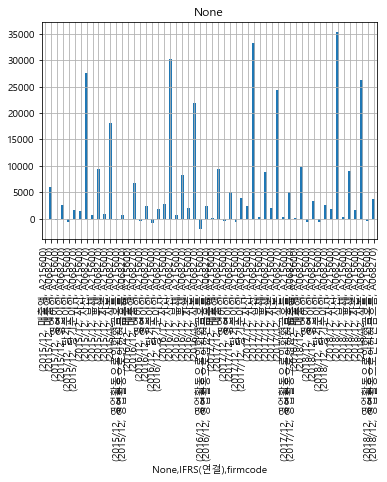

In [33]:
fs_t_data.unstack().plot(kind='bar',subplots=True)

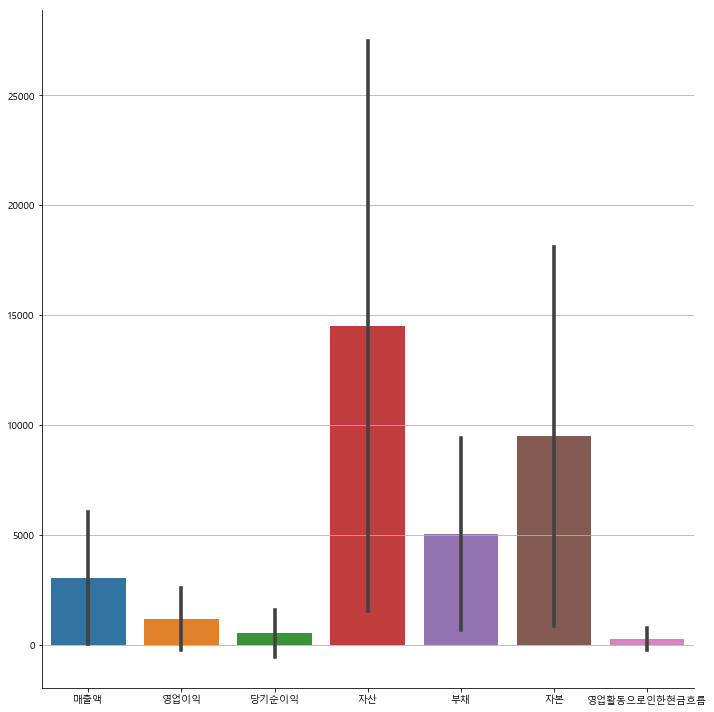

In [34]:
fg = sns.catplot(data=fs_t_data['2015/12'], kind='bar',height=10)

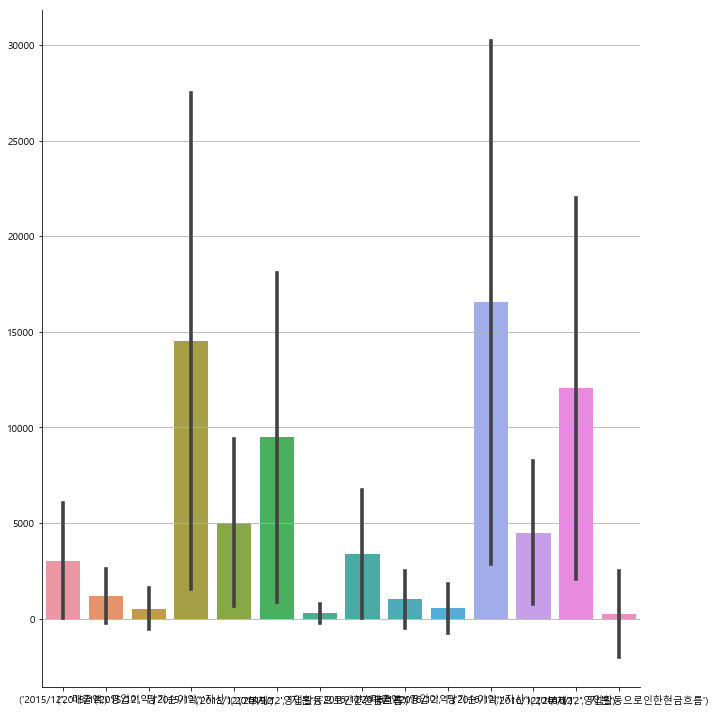

In [35]:
fg = sns.catplot(data=fs_t_data[['2015/12','2016/12']], kind='bar',height=10)

In [36]:
x = fs_t_data.iloc[:, :6]

In [37]:
x = x.unstack()

In [38]:
x = x.unstack(level=2)

In [39]:
x.head()

firmcode          A215600  A068270
        IFRS(연결)                  
2015/12 매출액          18.0   6034.0
        영업이익       -238.0   2590.0
        당기순이익      -559.0   1583.0
        자산         1530.0  27482.0
        부채          661.0   9384.0

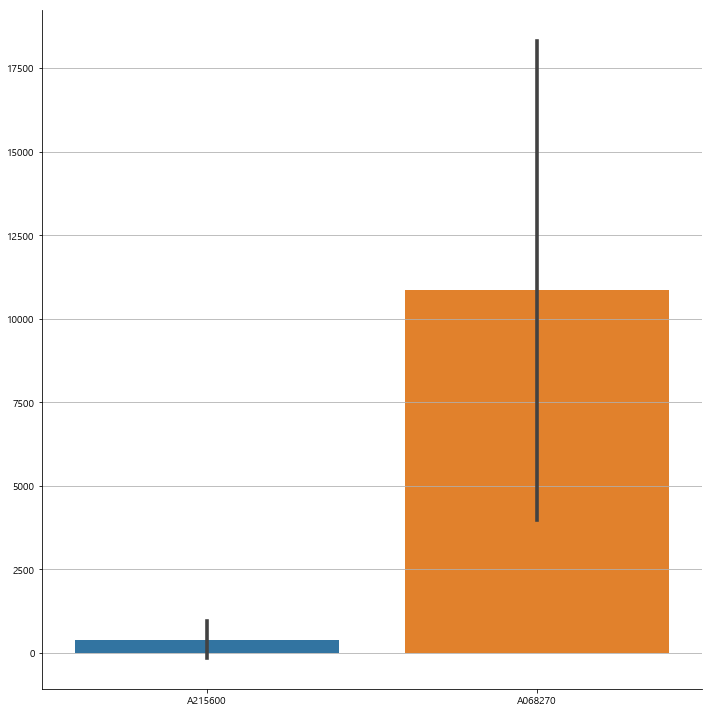

In [40]:
fg = sns.catplot(data=x, kind='bar',height=10)